# PCA on Hearth Disease

In [21]:
# importing the libraries

import os
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### 1. Importing the dataset

In [20]:
filename = os.path.join(os.getcwd(), 'heart_disease.csv')

data = pd.read_csv(filename)
data.head(5)

HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  \
0       0.0           0.0     0.0      1.0                0.0      5.0   
1       0.0           1.0     0.0      0.0                0.0      3.0   
2       0.0           0.0     1.0      0.0                0.0      5.0   
3       0.0           1.0     1.0      1.0                0.0      2.0   
4       0.0           1.0     1.0      1.0                0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income  
0      18.0      15.0       1.0  0.0   9.0        4.0     3.0  
1       0.0       0.0       0.0  0.0   7.0        6.0     1.0  
2      30.0      30.0       1.0  0.0   9.0        4.0     8.0  
3       0.0       0.0       0.0  0.0  11.0        3.0     6.0  
4       3.0       0.0       0.0  0.0  11.0        5.0     4.0

### 2. Behavioural Dataframe 

In [ ]:
behav_df = data.drop(['HeartDiseaseorAttack', 'HighBP', 'HighChol',\
                      'CholCheck', 'BMI', 'Stroke', 'Diabetes'], axis=1)
behav_df.head(5)

It is difficult to visualize high dimensional data, that is why we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

In [19]:
scaler = StandardScaler()

behav_df_scaled = scaler.fit_transform(behav_df)
bdfs = pd.DataFrame(data=behav_df_scaled, columns=behav_df.columns[:])
bdfs.head(5)

Smoker  PhysActivity    Fruits   Veggies  HvyAlcoholConsump   GenHlth  \
0  1.120927     -1.762814 -1.316872  0.482087          -0.244014  2.329121   
1  1.120927      0.567275 -1.316872 -2.074316          -0.244014  0.457294   
2 -0.892119     -1.762814  0.759375 -2.074316          -0.244014  2.329121   
3 -0.892119      0.567275  0.759375  0.482087          -0.244014 -0.478619   
4 -0.892119      0.567275  0.759375  0.482087          -0.244014 -0.478619   

   MentHlth  PhysHlth  DiffWalk       Sex       Age  Education    Income  
0  1.998592  1.233999  2.223615 -0.887021  0.316900  -1.065595 -1.474487  
1 -0.429630 -0.486592 -0.449718 -0.887021 -0.337933   0.963272 -2.440138  
2  3.617407  2.954590  2.223615 -0.887021  0.316900  -1.065595  0.939638  
3 -0.429630 -0.486592 -0.449718 -0.887021  0.971733  -2.080028 -0.026012  
4 -0.024926 -0.486592 -0.449718 -0.887021  0.971733  -0.051162 -0.991662

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instaniuate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [5]:
pca = PCA(n_components=None, random_state=42)
bdfs_pca = pca.fit(bdfs)
print(bdfs_pca.explained_variance_ratio_)

[0.22721504 0.10349911 0.0905349  0.08675781 0.07935085 0.07138061
 0.06130097 0.06045149 0.05569365 0.04922075 0.04148435 0.03897068
 0.03413979]


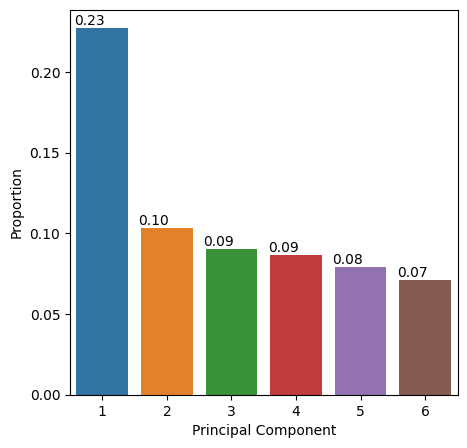

In [6]:
dset = pd.DataFrame()
dset['pca'] = range(1,7)
dset['vari'] = pd.DataFrame(bdfs_pca.explained_variance_ratio_)

plt.figure(figsize=(5,5))
graph = sns.barplot(x='pca', y='vari', data=dset)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                   ha='center', va='bottom',
                   color= 'black')
plt.ylabel('Proportion', fontsize=10)
plt.xlabel('Principal Component', fontsize=10)
plt.show()

The percentages on each bar indicate the proportion of total variance explained by the respective principal component. The first principal component explained approximately 23% of the total variation. With 10%, the second principal component accounted for the second most variation and the third principal component accounted for 9% of the total variation.

The firsts 4 components together explain the 51% of the variance.

In [ ]:
bdf_trans = pca.transform(bdfs)
bdf_trans = pd.DataFrame(data=bdf_trans)
bdf_trans.head(5)

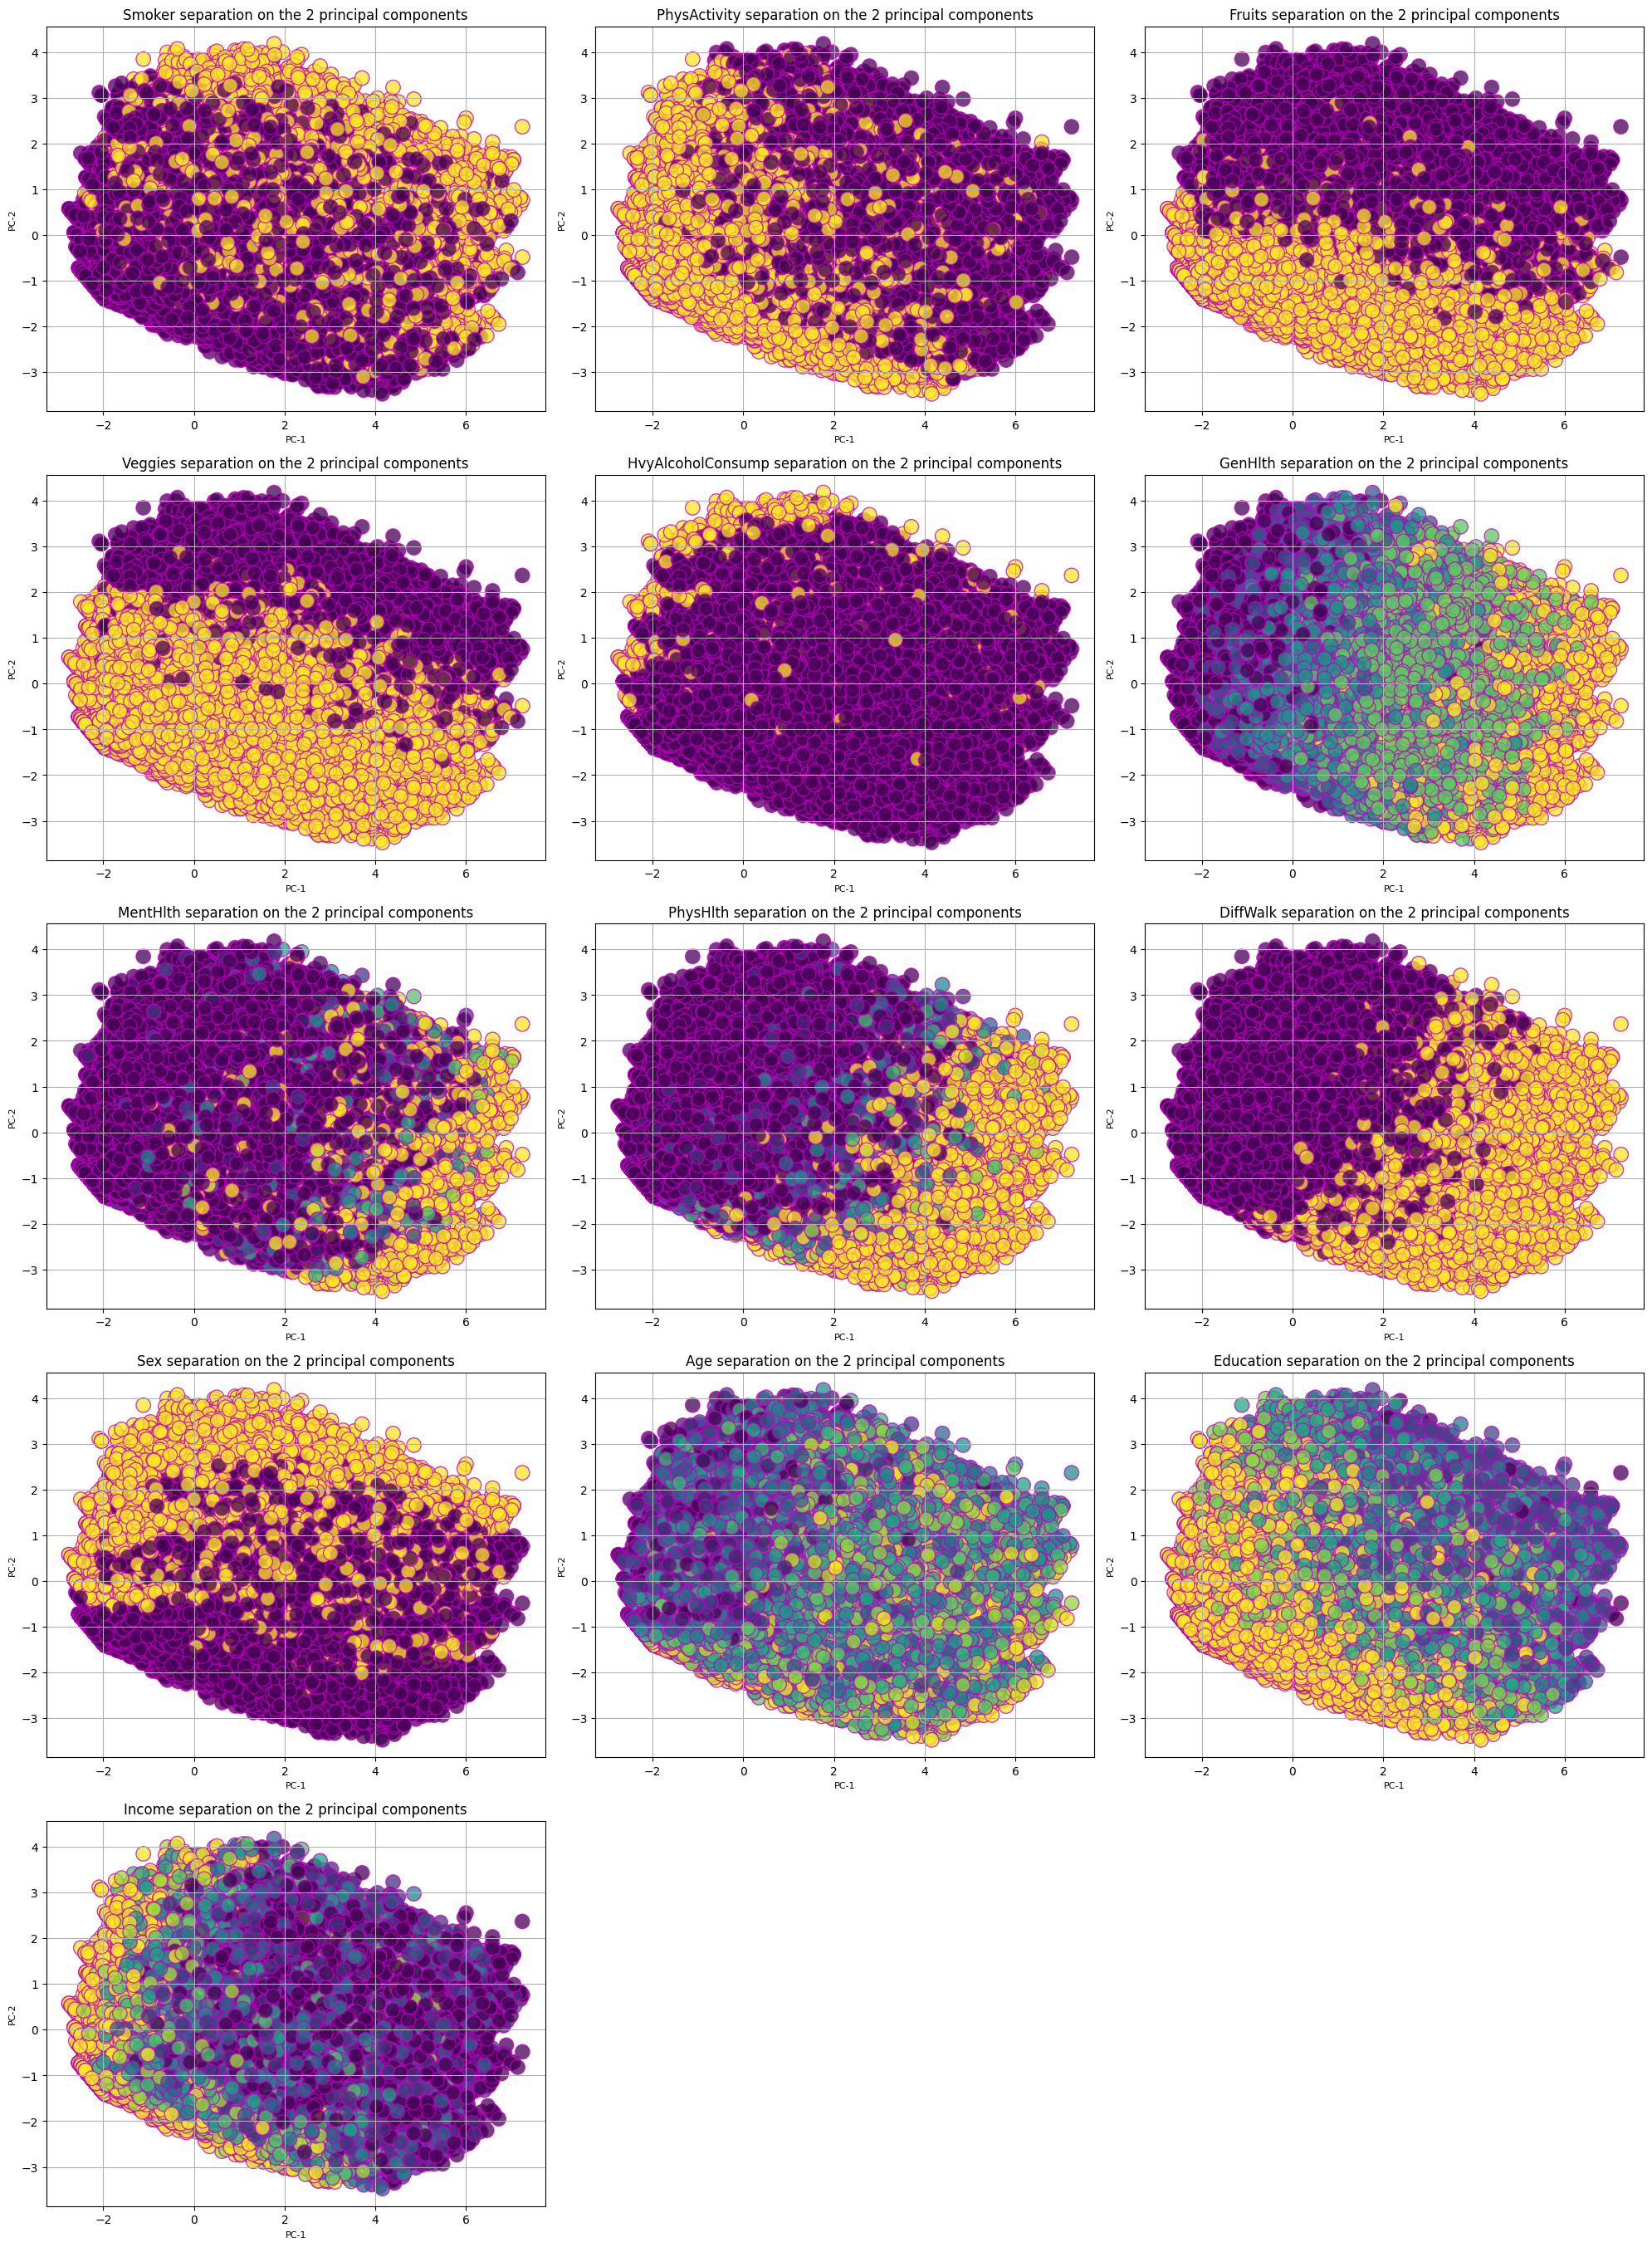

In [12]:
a = len(behav_df.columns[:])  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,70))

for cols in behav_df.columns[:]:
    plt.subplot(a, b, c)
    plt.scatter(bdf_trans[0], bdf_trans[1], c=behav_df[cols], edgecolors='m', alpha=0.75, s=158)
    plt.grid(True)
    plt.title(cols+' separation on the 2 principal components', fontsize=12) 
    plt.xlabel("PC-1", fontsize=8)
    plt.ylabel("PC-2", fontsize=8)
    c = c + 1

plt.tight_layout()
plt.show()

### 2. Complete Dataset

In [ ]:
df_scaled = scaler.fit_transform(data)
dfs = pd.DataFrame(data=df_scaled, columns=data.columns[:])
dfs.head(5)

In [14]:
pca = PCA(n_components=None, random_state=42)
dfs_pca = pca.fit(dfs)
print(dfs_pca.explained_variance_ratio_)

[0.18168216 0.08015841 0.06756937 0.05930216 0.05764386 0.05181384
 0.04934129 0.04634673 0.04427407 0.0429837  0.03953298 0.03751344
 0.03730777 0.03604308 0.03551815 0.03327035 0.02796352 0.02616202
 0.02460568 0.02096742]


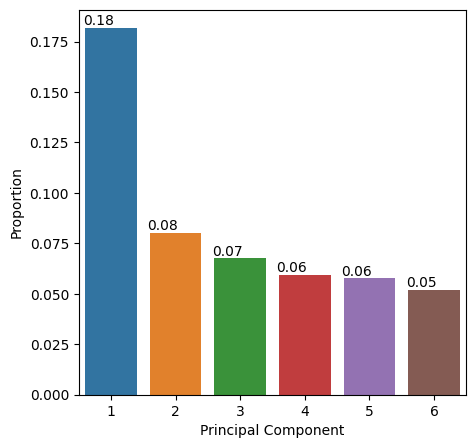

In [15]:
dset = pd.DataFrame()
dset['pca'] = range(1,7)
dset['vari'] = pd.DataFrame(dfs_pca.explained_variance_ratio_)

plt.figure(figsize=(5,5))
graph = sns.barplot(x='pca', y='vari', data=dset)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                   ha='center', va='bottom',
                   color= 'black')
plt.ylabel('Proportion', fontsize=10)
plt.xlabel('Principal Component', fontsize=10)
plt.show()

We need 6 components now to explain the 50% of the total variance

In [ ]:
df_trans = pca.transform(dfs)
df_trans = pd.DataFrame(data=df_trans)
df_trans.head(5)

In [ ]:
a = len(data.columns[:])  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,70))

for cols in data.columns[:]:
    plt.subplot(a, b, c)
    plt.scatter(df_trans[0], df_trans[1], c=behav_df[cols], edgecolors='m', alpha=0.75, s=158)
    plt.grid(True)
    plt.title(cols+' separation on the 2 principal components', fontsize=12) 
    plt.xlabel("PC-1", fontsize=8)
    plt.ylabel("PC-2", fontsize=8)
    c = c + 1

plt.tight_layout()
plt.show()